In [1]:
import scipy.io as scio

path = r'D:\Users\Pcd\Documents\WeChat Files\ch1en66\FileStorage\File\2021-01\data\Test_0018'
data = scio.loadmat(path)

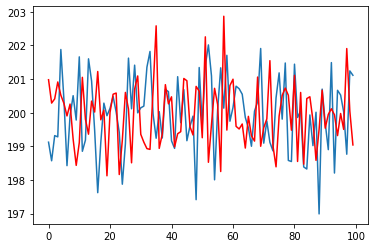

In [27]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.io as scio
from numpy.random.mtrand import randn

ys = 200 + np.random.randn(2, 100)
x = [x for x in range(len(ys[0]))]

# plt.plot(x, ys, 'b')
# plt.show()
plt.plot(x, ys[0], '-', x, ys[1], 'r')

In [9]:
import sys
import pandas as pd
import numpy as np 

data = pd.read_csv('./hw1_data/train.csv', encoding='big5')
data = data.iloc[:, 3:]
data[data == 'NR'] = 0
raw_data = data.to_numpy()

In [13]:
month_data = {}
for month in range(12):
    sample = np.empty([18, 480])
    for day in range(20):
        sample[:, day * 24 : (day + 1) * 24] = raw_data[18 * (20 * month + day) : 18 * (20 * month + day + 1), :]
    month_data[month] = sample

In [19]:
x = np.empty([471 * 12, 18 * 9])
y = np.empty([471 * 12, 1])

for month in range(12):
    for day in range(20):
        for hour in range(24):
            if day == 19 and hour > 14:
                continue
            x[month * 471 + day * 24 + hour, :] = month_data[month][:, day * 24 + hour : day * 24 + hour + 9].reshape(1, -1)
            y[month * 471 + day * 24 + hour, 0] = month_data[month][9, day * 24 + hour + 9] #第九项是PM2.5
print(x)
print(y)

[[14.  14.  14.  ...  2.   2.   0.5]
 [14.  14.  13.  ...  2.   0.5  0.3]
 [14.  13.  12.  ...  0.5  0.3  0.8]
 ...
 [17.  18.  19.  ...  1.1  1.4  1.3]
 [18.  19.  18.  ...  1.4  1.3  1.6]
 [19.  18.  17.  ...  1.3  1.6  1.8]]
[[30.]
 [41.]
 [44.]
 ...
 [17.]
 [24.]
 [29.]]


In [22]:
mean_x = np.mean(x, axis=0)
std_x = np.std(x, axis=0)
for i in range(len(x)):
    for j in range(len(x[0])):
        if std_x[j] != 0:
            x[i][j] = (x[i][j] - mean_x[j]) / std_x[j]

In [23]:
import math
x_train_set = x[: math.floor(len(x) * 0.8), :]
y_train_set = y[: math.floor(len(y) * 0.8), :]
x_validation = x[math.floor(len(x) * 0.8): , :]
y_validation = y[math.floor(len(y) * 0.8): , :]

In [25]:
#training:
w = np.ones((18 * 9, 1))
init_lr = 0.1
itr = 10

for i in range(itr):
    yy = np.dot(x, w)
    

5652 162
